In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

In [3]:
# Load dataset

df = pd.read_csv("C:\\Users\\silad\\OneDrive\\Desktop\\Project\\Data\\LoyaltyVision Analytics_data_01.csv")

In [4]:
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130,Mobile
5,20005,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139,Computer
6,20006,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,121,Mobile
7,20007,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,123,Mobile
8,20008,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,127,Mobile
9,20009,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,123,Mobile


In [5]:
df.shape

(11260, 19)

In [6]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11042.000000,11148.000000,11158.000000,11162.000000,10816.000000,11144.000000,10469.000000,10903.000000,11257.000000,11257.000000,10902.000000,11260.000000
mean,25629.50000,0.168384,11.025086,1.653929,17.867091,2.902526,3.692862,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.225488
std,3250.62635,0.374223,12.879782,0.915015,8.853269,0.725584,1.022976,1.379772,11.909686,0.451594,3.757721,1.969551,3.697637,174.863860
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,148.000000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,167.000000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,197.000000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [8]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score             116
Marital_Status               0
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                     0
Login_device                 0
dtype: int64

In [9]:
# Convert object-based numerical columns to numeric
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['rev_growth_yoy'] = pd.to_numeric(df['rev_growth_yoy'], errors='coerce')


In [10]:
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130,Mobile
5,20005,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139,Computer
6,20006,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,121,Mobile
7,20007,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,123,Mobile
8,20008,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,127,Mobile
9,20009,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,123,Mobile


In [11]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [12]:
# Impute missing values
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
# Outlier treatment using IQR (excluding binary/categorical encoded columns and low cardinality integers)
def treat_outliers_iqr(data, col):
    if pd.api.types.is_numeric_dtype(data[col]) and data[col].nunique() > 10:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower, lower,
                             np.where(data[col] > upper, upper, data[col]))

outlier_cols = [col for col in numeric_cols if col not in ['AccountID', 'Churn', 'Tenure']]
for col in outlier_cols:
    treat_outliers_iqr(df, col)

In [14]:
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


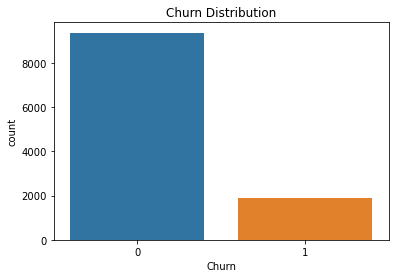

In [15]:
# EDA - Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

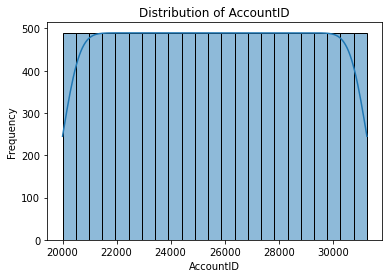

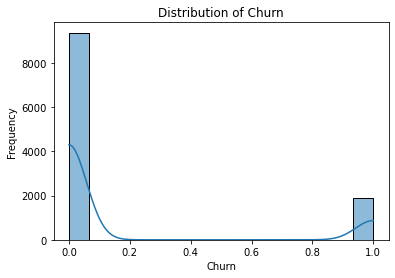

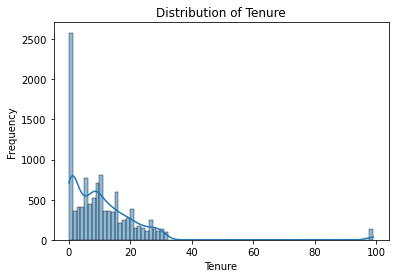

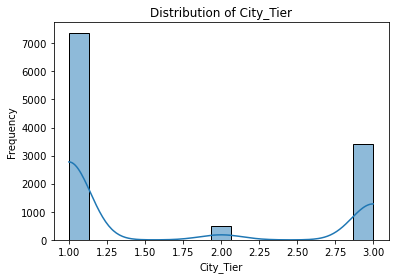

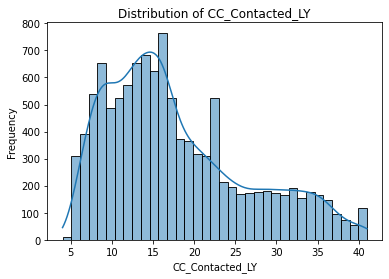

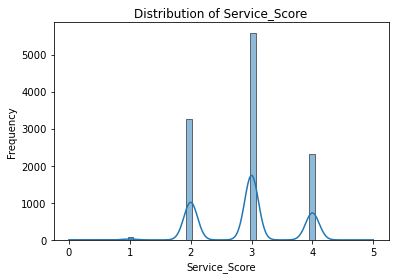

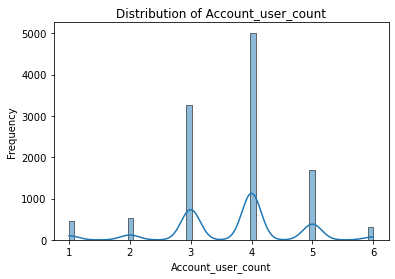

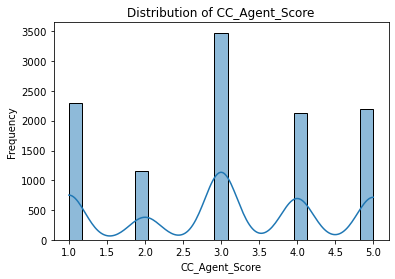

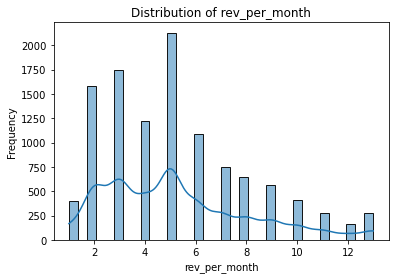

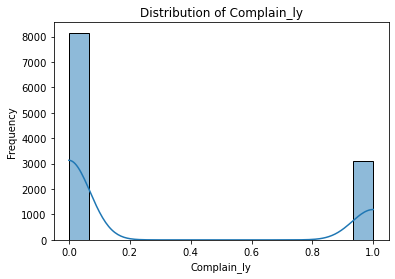

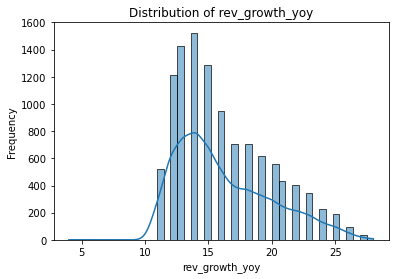

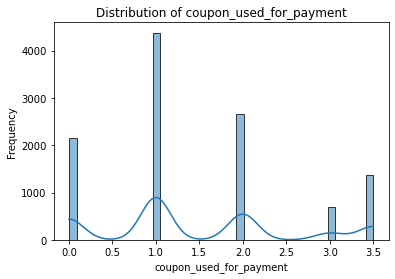

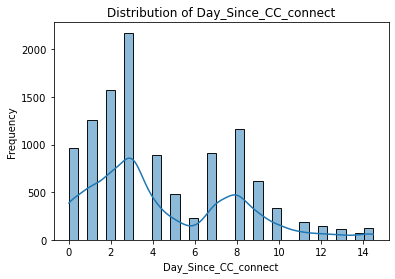

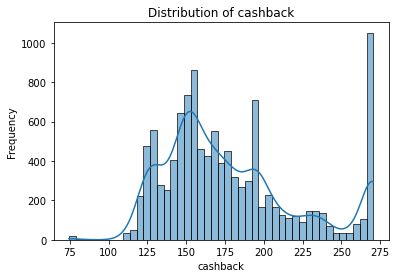

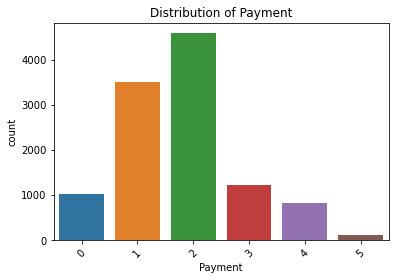

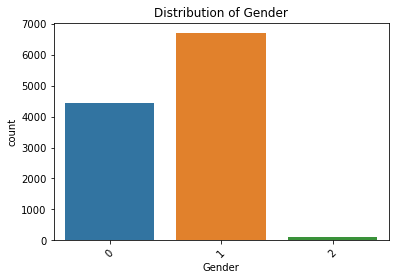

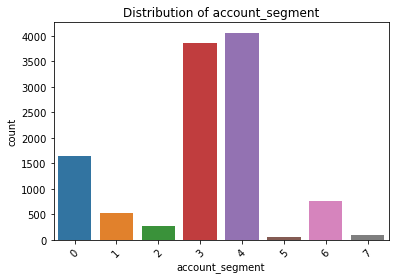

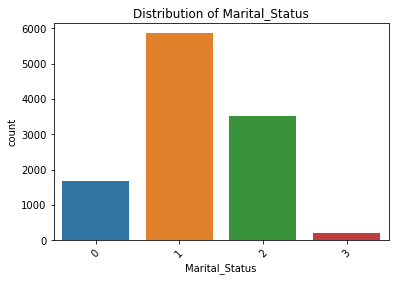

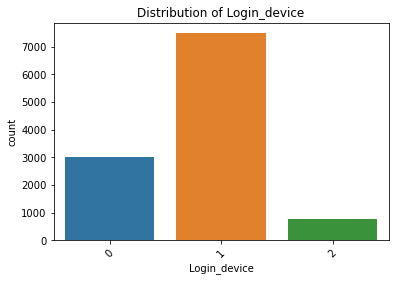

In [16]:

# Univariate Analysis

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

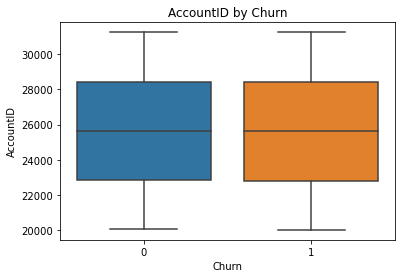

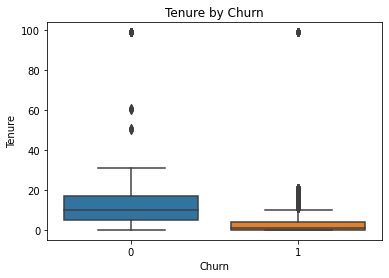

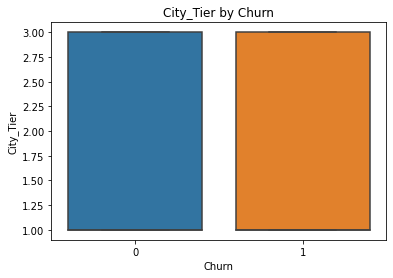

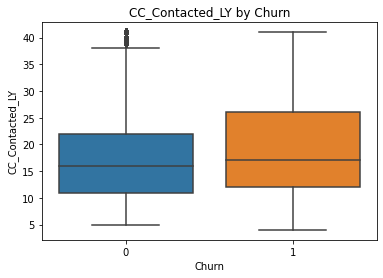

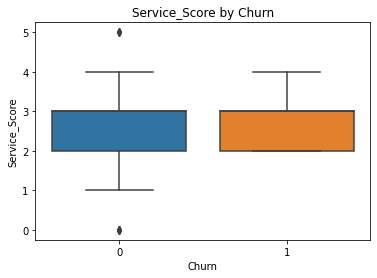

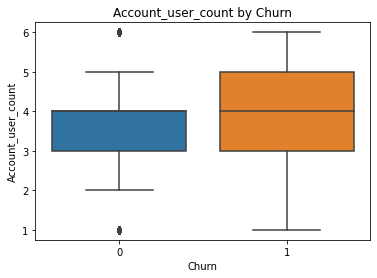

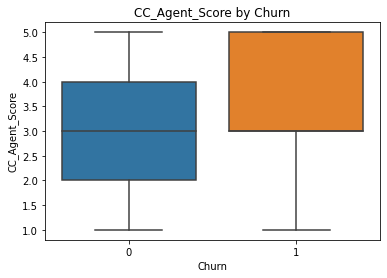

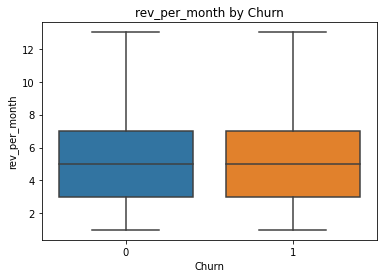

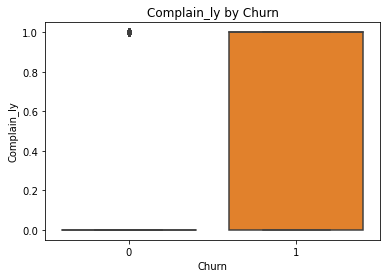

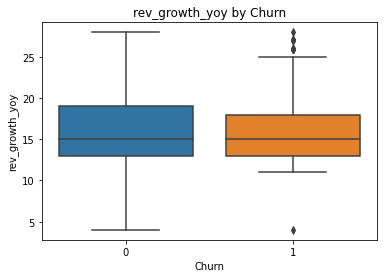

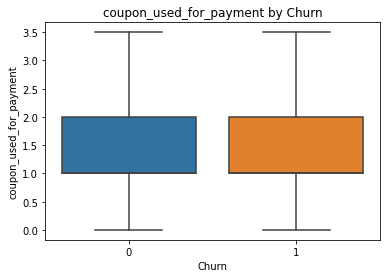

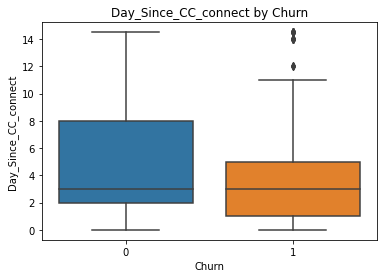

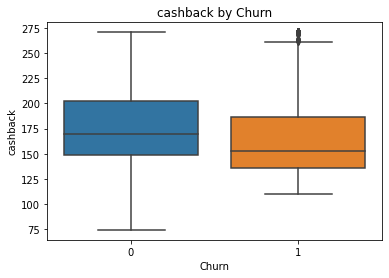

In [17]:

# Bivariate Analysis

for col in numeric_cols:
    if col != 'Churn':
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='Churn', y=col)
        plt.title(f"{col} by Churn")
        plt.show()

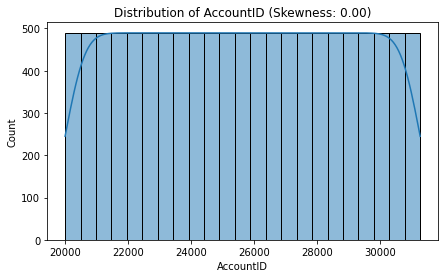

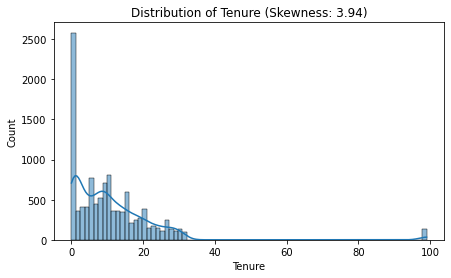

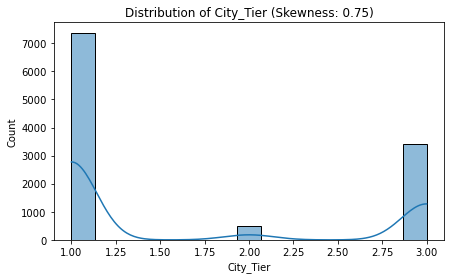

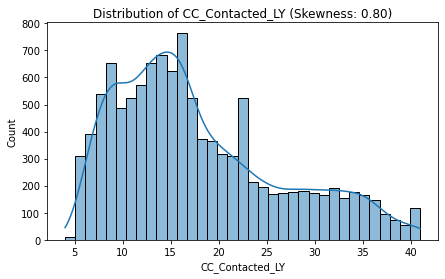

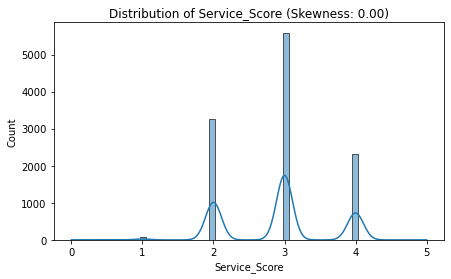

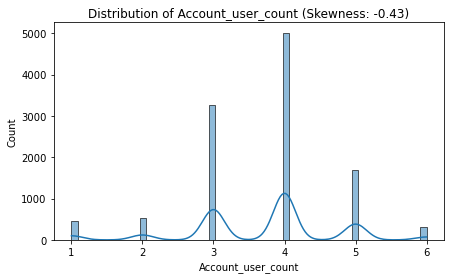

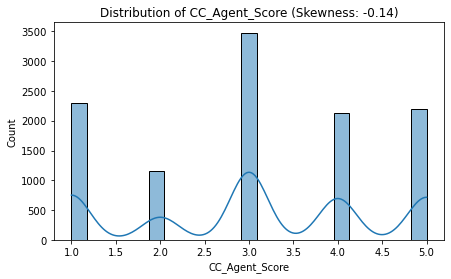

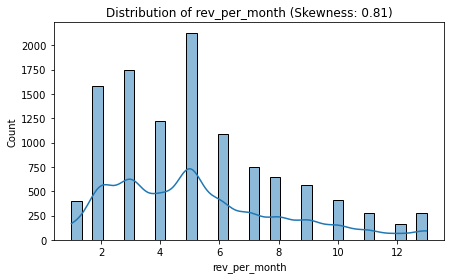

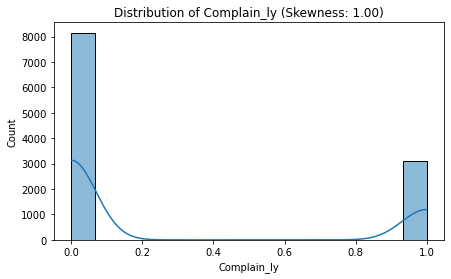

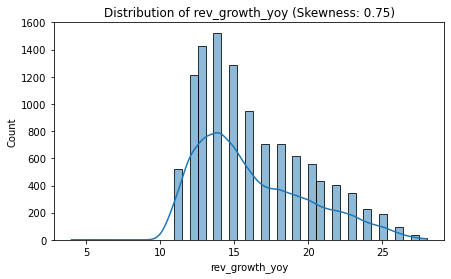

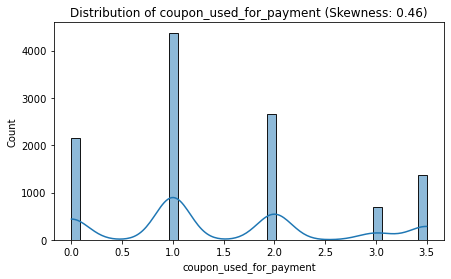

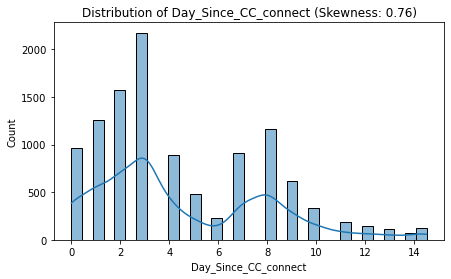

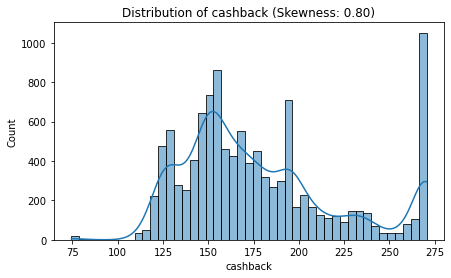

In [18]:
# Distribution and Skewness of all numeric features
for col in numeric_cols:
    if col != 'Churn':
        plt.figure(figsize=(7, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col} (Skewness: {df[col].skew():.2f})")
        plt.show()


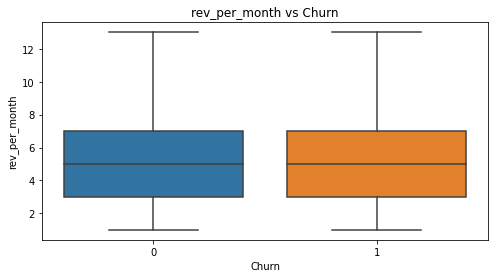

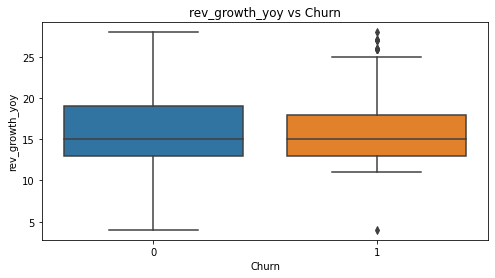

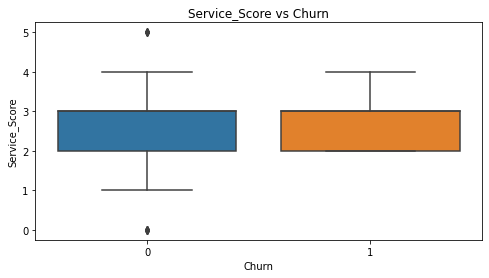

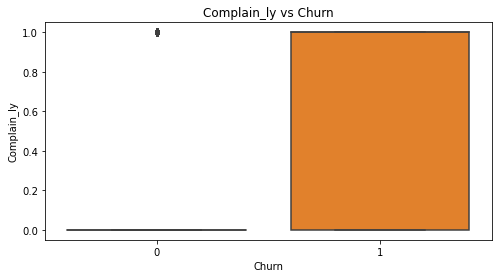

In [19]:
# Boxplots comparing churn
for col in ['rev_per_month', 'rev_growth_yoy', 'Service_Score', 'Complain_ly']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

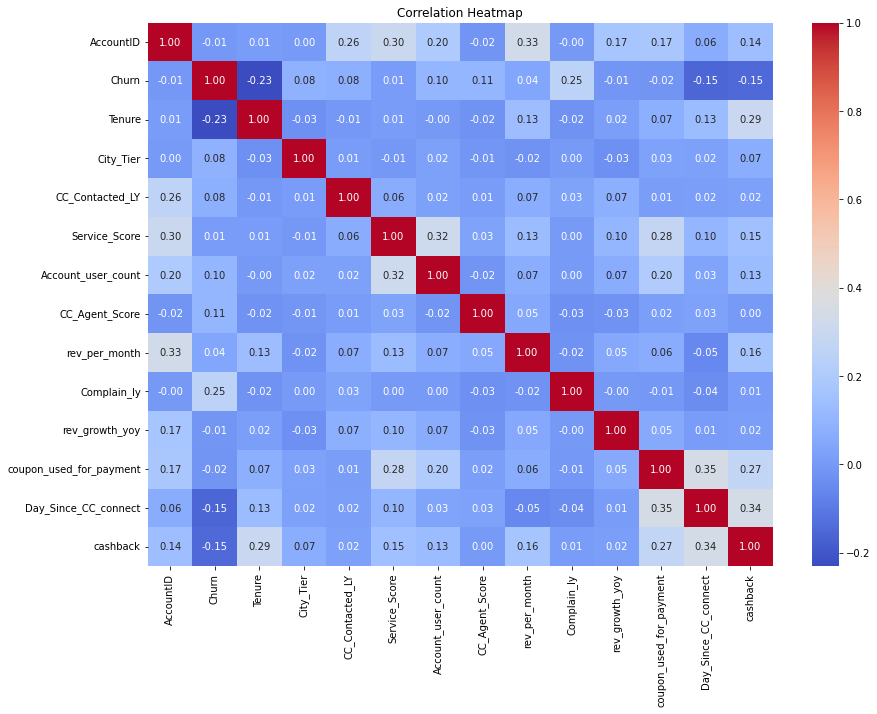

In [20]:
# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


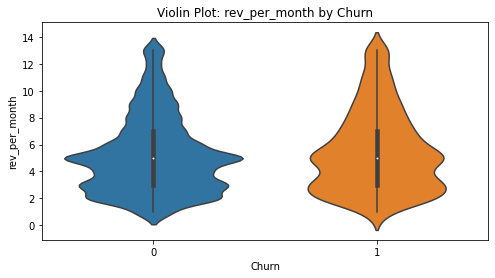

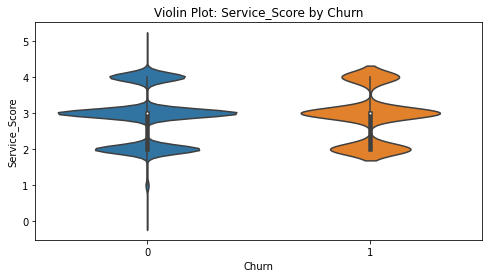

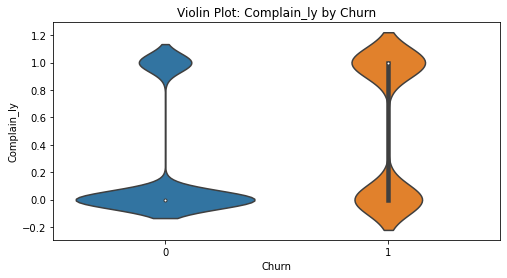

In [21]:
# Violin plots for detailed distribution
for col in ['rev_per_month', 'Service_Score', 'Complain_ly']:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Churn', y=col, data=df)
    plt.title(f'Violin Plot: {col} by Churn')
    plt.show()


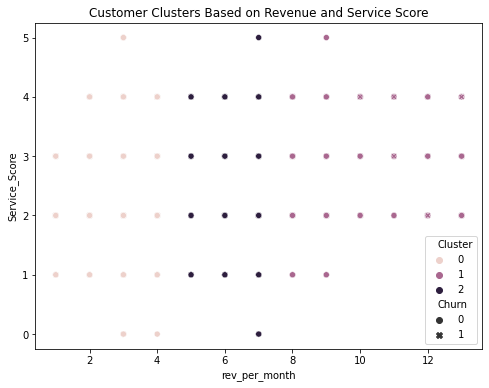

In [22]:
# Clustering for insight
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_features = df[['rev_per_month', 'Service_Score', 'Complain_ly']]
df['Cluster'] = kmeans.fit_predict(kmeans_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rev_per_month', y='Service_Score', hue='Cluster', style='Churn')
plt.title('Customer Clusters Based on Revenue and Service Score')
plt.show()

In [23]:
# Feature-target split
X = df.drop(['AccountID', 'Churn'], axis=1)
y = df['Churn']

In [24]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [27]:
# Hyperparameter tuning for Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
rf_search = GridSearchCV(rf, rf_grid, cv=5, scoring='accuracy')
rf_search.fit(X_resampled, y_resampled)
best_rf = rf_search.best_estimator_
print("Best Random Forest Params:", rf_search.best_params_)


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [53]:
# Hyperparameter tuning for Gradient Boosting
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb = GradientBoostingClassifier(random_state=42)
gb_search = GridSearchCV(gb, gb_grid, cv=5, scoring='accuracy')
gb_search.fit(X_resampled, y_resampled)
best_gb = gb_search.best_estimator_
print("Best Gradient Boosting Params:", gb_search.best_params_)

Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}



Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1873
           1       0.93      0.89      0.91       379

    accuracy                           0.97      2252
   macro avg       0.95      0.94      0.95      2252
weighted avg       0.97      0.97      0.97      2252

Confusion Matrix:
[[1846   27]
 [  40  339]]

Tuned Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1873
           1       0.89      0.81      0.85       379

    accuracy                           0.95      2252
   macro avg       0.92      0.90      0.91      2252
weighted avg       0.95      0.95      0.95      2252

Confusion Matrix:
[[1833   40]
 [  71  308]]

AdaBoost Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1873
           1       0.58      0.75      0.65       379

    accuracy

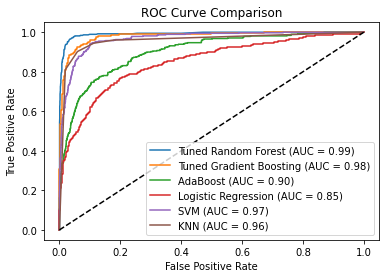

In [56]:
# Models to compare
models = {
    'Tuned Random Forest': best_rf,
    'Tuned Gradient Boosting': best_gb,
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4),
        'ROC AUC': round(auc, 4)
    })

    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    # Compare ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [57]:
# Display comparison results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values(by='ROC AUC', ascending=False))



Model Comparison:
                     Model  Accuracy  F1 Score  ROC AUC
0      Tuned Random Forest    0.9702    0.9101   0.9920
1  Tuned Gradient Boosting    0.9507    0.8473   0.9812
4                      SVM    0.9161    0.7830   0.9673
5                      KNN    0.8970    0.7553   0.9591
2                 AdaBoost    0.8672    0.6543   0.9012
3      Logistic Regression    0.7487    0.5162   0.8476
